# Understanding Customer Churn
## Using Survival analysis and Kaplan-Meier (KM) curves

## Conclusion (if you don't want to read to the end)
#### However, there are many techniques of data cleanup, evaluation, and data engineering contained within

Data analysis plays a pivotal role in evidence-based decision-making across industries. One critical challenge many companies face is customer churn, the loss of clients or subscribers. Understanding the factors that influence churn is essential for developing effective retention strategies.

Survival analysis and Kaplan-Meier (KM) curves are powerful tools for visualizing and comparing the time-to-event patterns between groups (e.g., churned vs. non-churned customers). These techniques can unveil unexpected disparities, highlighting areas for further investigation.

In the telecommunications industry, it's often assumed that longer contract durations lead to lower churn. However, a deeper analysis of available data often reveals a different reality. While long-term contracts might initially attract customers, the spike in churn rates observed upon contract expiration suggests that customer satisfaction and perceived value may not be sustained throughout the contract period. This could be attributed to various factors, such as service quality, pricing, or changing customer needs.

To gain a more comprehensive understanding of churn drivers, it's crucial to explore a wider range of variables. Analyzing factors like customer service interactions (e.g., calls to tech support), service outages, and other relevant metrics can provide valuable insights.

Addressing churn often involves a multi-faceted approach. While some "quick wins" can be achieved through relatively simple interventions, a comprehensive data analysis can uncover deeper, systemic issues that require more substantial solutions.  By understanding the root causes of churn and tailoring retention strategies accordingly, companies can foster long-term customer loyalty and drive sustainable growth.

#### Key Improvements:

* <b>Clarity</b>: The revised conclusion is more concise and focused, eliminating unnecessary details and redundancies.
Emphasis on Data Analysis: The importance of thorough data analysis for both identifying quick wins and uncovering systemic issues is highlighted.
* <b>Balanced Perspective</b>: The conclusion acknowledges the potential limitations of relying solely on contract length as a churn predictor and advocates for a broader analysis of contributing factors.
* <b>Actionable Recommendations</b>: The revised conclusion indirectly suggests that companies should focus on improving customer satisfaction and service quality, along with implementing targeted retention strategies based on data-driven insights.

## Data Description

The dataset used in this project contains information about customers subscribed to a Telecom Service Provider. Each row depicts a single customer uniquely identified by a customerID. The variables of interest to us is 'tenure' and 'Churn'.

'Tenure' is a continuous variable and essentially specifies how long (in months) the customer has stayed with the company. 
'Churn' is a categorical variable with two values where:
Churn = 'Yes' - the customer has cancelled subscription with the company
Churn = 'No'  - the customer has been censored (or) lost track of the customer

Other variables include information about the different services the customer has subscribed to and also his/her demographic information.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from decimal import Decimal

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("data/customer_churn_data.csv")
df.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

## Data Cleanup

### confirm currency fields are not strings

In [5]:
# Convert to float first for rounding
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Round to two decimal places
# for this dataset, two decimal places are preferred.
df['MonthlyCharges'] = df['MonthlyCharges'].round(2) 
df['TotalCharges'] = df['TotalCharges'].round(2)  

### change Yes/No and 1/0 to the boolean values True/False

In [6]:
boolean_cols = ['SeniorCitizen', 
                'Partner', 
                'Dependents', 
                'PhoneService', 
                'MultipleLines',
                'OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies',
                'PaperlessBilling',
                'Churn']

for boolean_col in boolean_cols:
    df[boolean_col] = df[boolean_col].map({
        'No': False, 'Yes': True, 
         0: False, 1: True,
        'No internet service': 'No internet service',
        'No phone service': 'No phone service'
    }) 

print('converted True and False equivalents to boolean values')

converted True and False equivalents to boolean values


### any duplicate customer records?

In [7]:
# Get value counts for the column
value_counts = df['CustomerID'].value_counts()

# Filter values that appear more than once (duplicates)
duplicates = value_counts[value_counts > 1]

print(duplicates)

Series([], Name: count, dtype: int64)


### any null values or missing data?

In [8]:
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### why are there some null values in total charges?
TotalCharges should equal Tenure * MonthlyCharges.

In [9]:
# Display rows where 'TotalCharges' has null values
null_rows = df[df['TotalCharges'].isnull()]
print(f"{null_rows['CustomerID']}, {null_rows['Tenure']}, {null_rows['MonthlyCharges']}, {null_rows['TotalCharges']}")

488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: CustomerID, dtype: object, 488     1
753     1
936     1
1082    1
1340    1
3331    1
3826    1
4380    1
5218    1
6670    1
6754    1
Name: Tenure, dtype: int64, 488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64, 488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64


### How to fix the bad data
COMMENTS It seems odd that some of the TotalCharges are Null (or NaN), a fix is to confirm that all
of the values stored in TotalCharges are calculated correctly (Tenure * MonthlyCharges). However,
if there were millions of rows of data, or if there were unrecognized errors in Tenure or MonthlyCharges,
the following code will only populate where TotalCharges is Null

In [10]:
# Calculate product and fill NaN values
df['TotalCharges'] = df['TotalCharges'].fillna(df['Tenure'] * df['MonthlyCharges'])

### confirm the TotalCharges are fixed
I would recommend going back to the source data and figuring out why 
TotalCharges is missing and the data in Tenure and MonthlyChares are accurate.

In [11]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.65,820.50,True
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.10,1949.40,False
7,6713-OKOMC,Female,False,False,False,10,False,No phone service,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.75,301.90,False
8,7892-POOKP,Female,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.80,3046.05,True
9,6388-TABGU,Male,False,False,True,62,True,False,DSL,True,...,False,False,False,False,One year,False,Bank transfer (automatic),56.15,3487.95,False


## Exploratory Data Analysis

'CustomerID' is a unique value assigned to a customer and is irrevalent to determine churn in this dataset.   
In a different dataset where multiple records exist per customer, CustomerID would be useful.

In [13]:
# drop unneeded column
df.drop(["CustomerID"], inplace = True, axis = 1)\

# Reindex columns
df.reset_index(drop=True, inplace=True)

In [14]:
# Get all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']) 

# place value counts in a dictionary
value_counts_dict = []
value_counts_dict = {col: df[col].value_counts() for col in categorical_cols}

for col, counts in value_counts_dict.items():
    print(f"\nColumn: {col}")
    print(counts)


Column: Gender
Gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
False    5901
True     1142
Name: count, dtype: int64

Column: Partner
Partner
False    3641
True     3402
Name: count, dtype: int64

Column: Dependents
Dependents
False    4933
True     2110
Name: count, dtype: int64

Column: PhoneService
PhoneService
True     6361
False     682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
False               3390
True                2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
False                  3498
True                   2019
No internet service    1526
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
False                  3088
True                   2429
No internet service    1526
Name: count, dtype: int64

Column: DevicePro

### Does the data seem plausable?
While the data seems plausable, it appears to be more-or-less accurate.
For example, it seems unlikely (to me) the number of electronic and mailed checks plus bank transfers 
would be greater than the number of people using credit or debit cards.

### Compare categorical data with churn

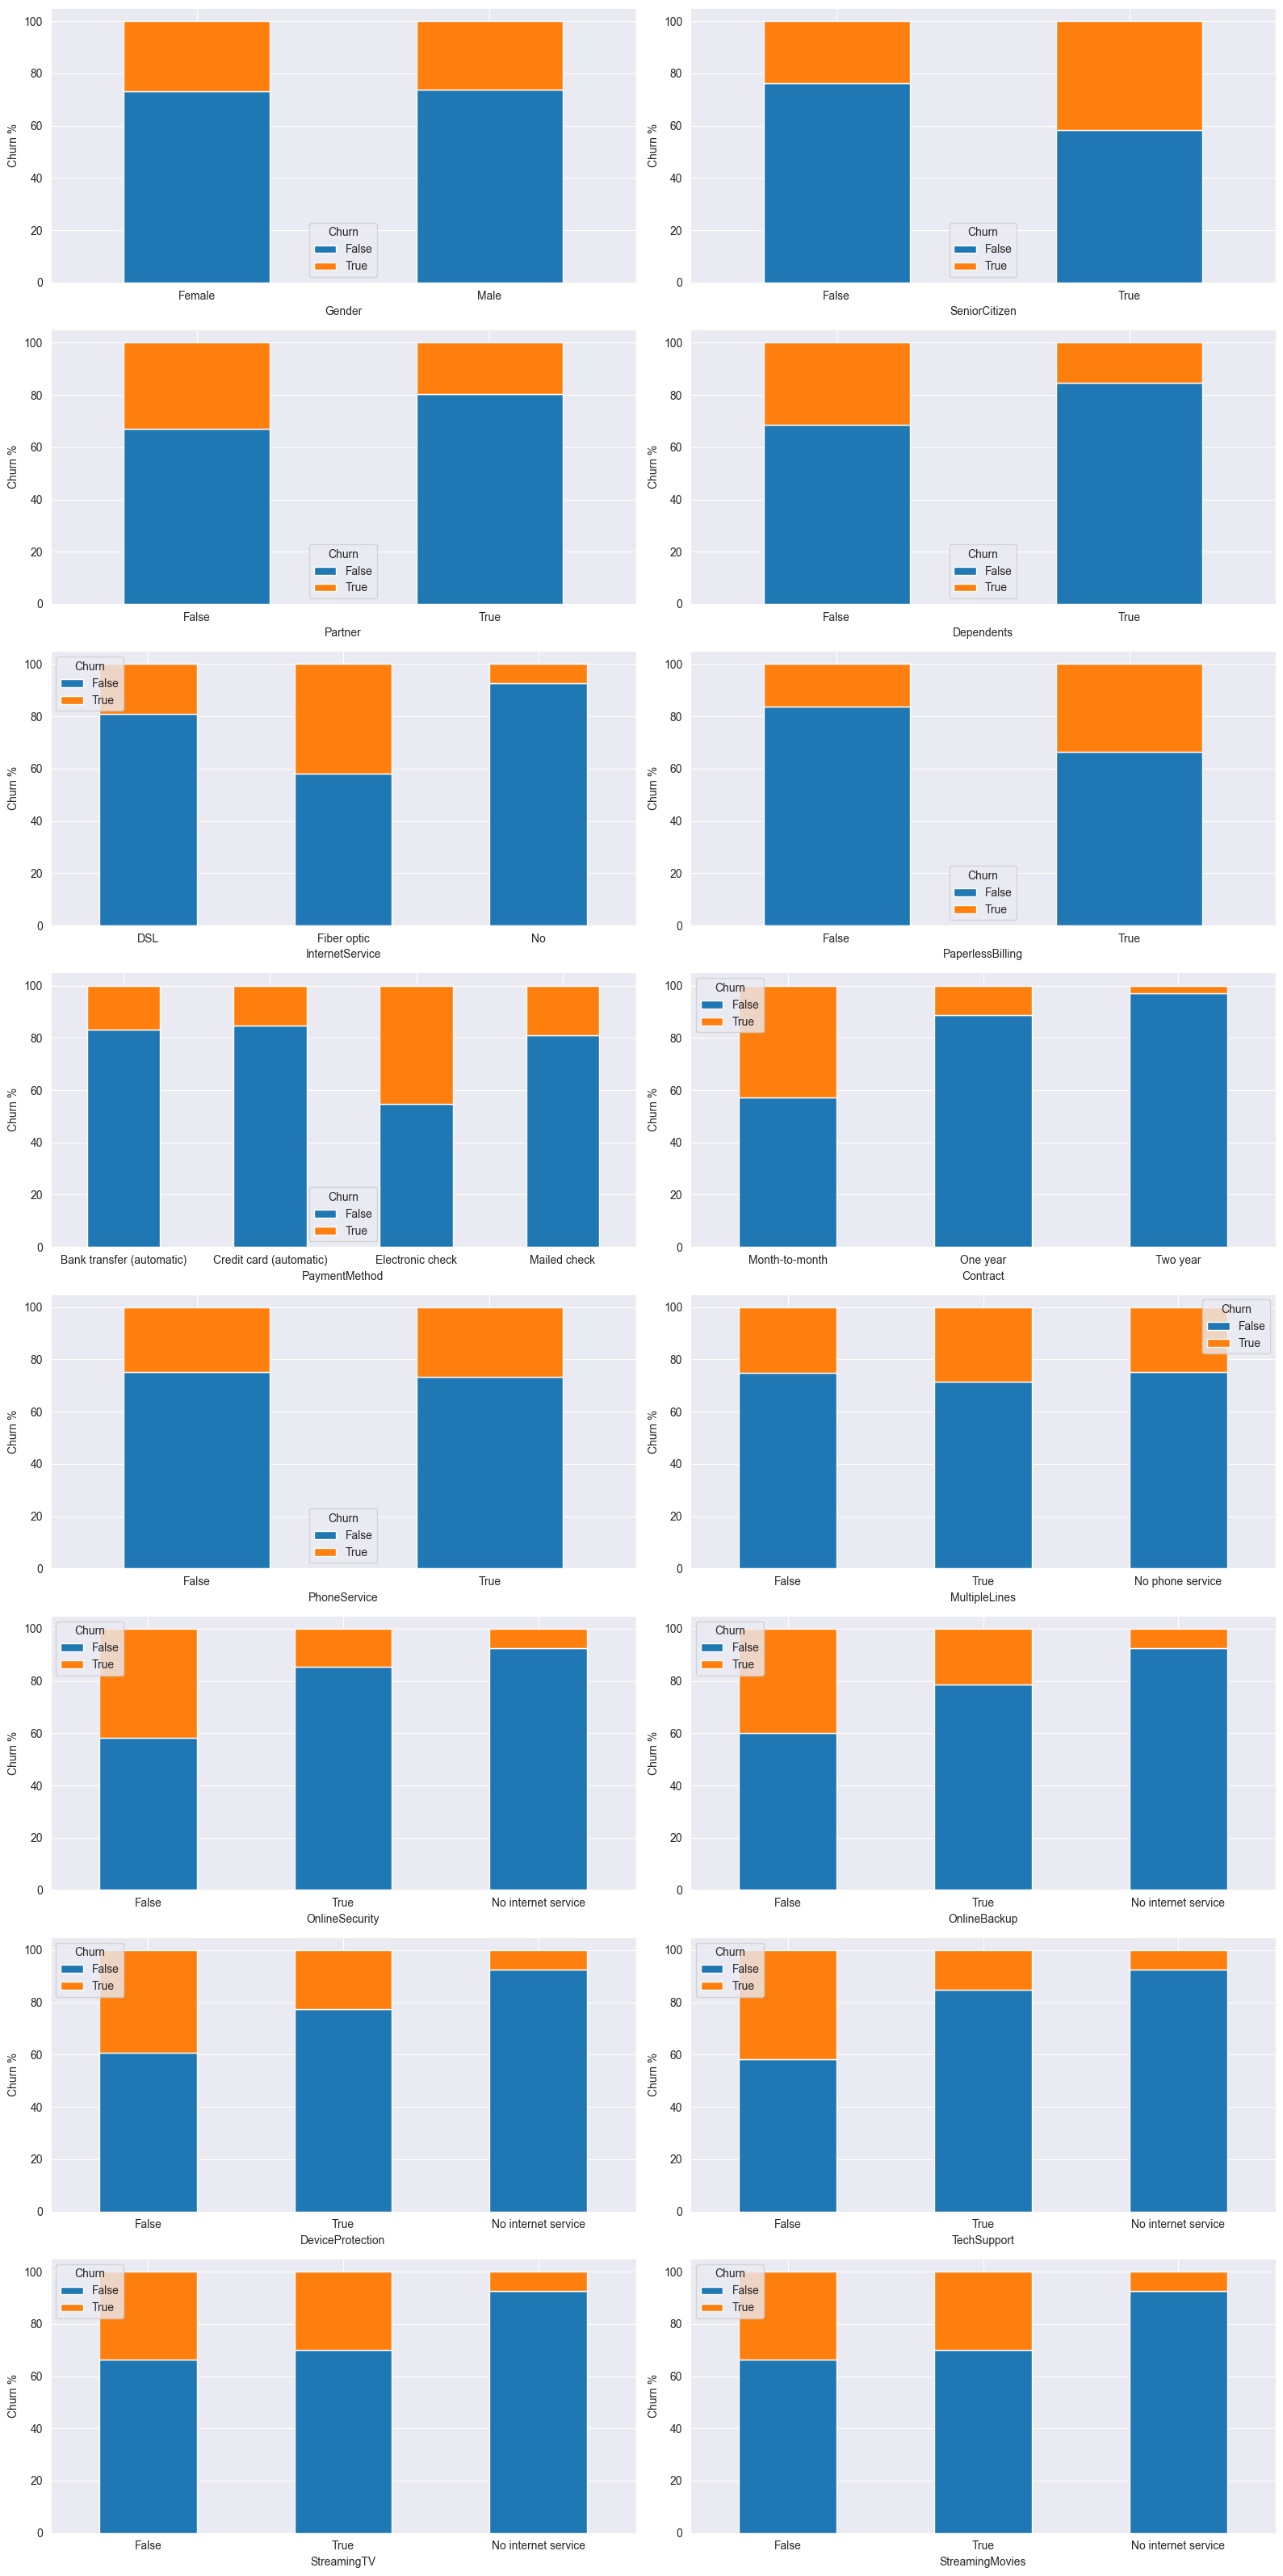

In [15]:
# Define a function to create a stacked bar plot for churn analysis
def get_plot(df, group, target, ax):
    # Calculate churn percentage within each group
    temp_df = (
        df.groupby([group, target]).size() * 100  # Count occurrences by group and target
        / df.groupby(group)[target].count()      # Normalize by total count in each group
    ).reset_index().pivot(                      # Reset index and pivot for plotting
        columns=target, index=group, values=0    # Use churn percentages as values
    )

    # Create stacked bar plot on the provided axes
    temp_df.plot(kind='bar', stacked=True, ax=ax) 

    # Customize the plot's appearance
    ax.xaxis.set_tick_params(rotation=0)      # Don't rotate x-axis labels
    ax.set_xlabel(group)                      # Set x-axis label to the grouping variable
    ax.set_ylabel('Churn %')                 # Set y-axis label to 'Churn %'

# Create a figure with 8 rows and 2 columns of subplots
fig, axes = plt.subplots(8, 2, figsize=(16, 32)) # Adjust figsize for larger plot

# Generate plots for various customer attributes
get_plot(df, "Gender", "Churn", axes[0, 0])
get_plot(df, "SeniorCitizen", "Churn", axes[0, 1])
get_plot(df, "Partner", "Churn", axes[1, 0])
get_plot(df, "Dependents", "Churn", axes[1, 1])
get_plot(df, "InternetService", "Churn", axes[2, 0])
get_plot(df, "PaperlessBilling", "Churn", axes[2, 1])
get_plot(df, "PaymentMethod", "Churn", axes[3, 0])
get_plot(df, "Contract", "Churn", axes[3, 1])
get_plot(df, "PhoneService", "Churn", axes[4, 0])
get_plot(df, "MultipleLines", "Churn", axes[4, 1])
get_plot(df, "OnlineSecurity", "Churn", axes[5, 0])
get_plot(df, "OnlineBackup", "Churn", axes[5, 1])
get_plot(df, "DeviceProtection", "Churn", axes[6, 0])
get_plot(df, "TechSupport", "Churn", axes[6, 1])
get_plot(df, "StreamingTV", "Churn", axes[7, 0])
get_plot(df, "StreamingMovies", "Churn", axes[7, 1])

# Adjust spacing between subplots for readability
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Ensure tight layout to prevent overlapping elements
plt.tight_layout()

# Display the figure with all the plots
plt.show()

Additional code below will assist in quantifying data.   
However, a visual examination can tell a lot about the data.
1) Customers with Fiber Optic instead of the options churn at a higher rate.
2) Paying by electronic check.
3) Purchase service month-by-month.
4) No online backup.
5) No online security.
6) No tech support.
7) Customer is a senior citizen.

There are also negative indicators of churn.   
For example, customers without internet service seem to churn at a much lower rate than those with internet.   
What is the root issue related to internet customers churning at a higher rate? Is it cost, performance, up-time, etc.?   
It may also be a technical or minor issue instead of a serious problem with the internet service offering. Customers without Tech Support churn at a much higher rate than those with support.

### Tenure (aka, how long have they been a customer, in months)

In [16]:
df['Tenure'].describe()

count    7043.000000
mean       32.372710
std        24.557454
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

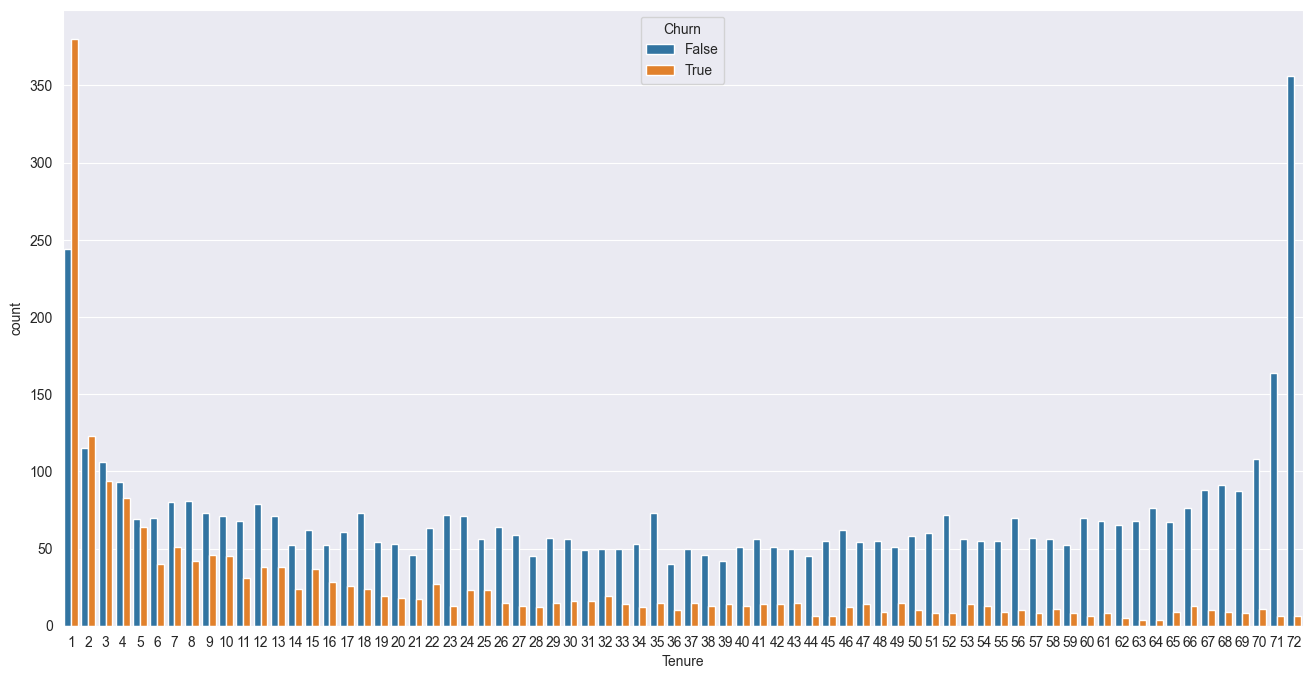

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(x="Tenure", hue="Churn", data=df)
plt.show()

#### Is it easier to make sense of the data if viewed by different units?
Years instead of months.

In [18]:
# use floor division to convert months to years
def months2years_floor_division(months):
    return months // 12 + 1

import math

def months2years_math_ceil(months):
    return math.ceil(months / 12)

def months2years_modified_floor(months):
    return (months - 2) // 12 + 1
    
print("Test using the distribution of the tenure data")
print("min         1.000000")
print("25%         9.000000")
print("50%        29.000000")
print("75%        55.000000")
print("max        72.000000")
print(f"1 month = {months2years_floor_division(1)} years")
print(f"9 months = {months2years_floor_division(9)} years")
print(f"29 months = {months2years_floor_division(28)} years")
print(f"55 months = {months2years_floor_division(55)} years")
print(f"72 months = {months2years_floor_division(72)} years")

print("\nTest function using data that is understandable and may change the analysis if used")
print(f"11 months = {months2years_floor_division(11)} years")
print(f"12 months = {months2years_floor_division(12)} years")
print(f"13 months = {months2years_floor_division(13)} years")

print("\n12 and 13 months equating to 2 years")
print("should 1 month = 1 year?")
print("seems to indicate we should use a different algorithum")

print("\nresults using math.ceil()")
print(f"1 month = {months2years_math_ceil(1)} years")
print(f"9 months = {months2years_math_ceil(9)} years")
print(f"11 months = {months2years_math_ceil(11)} years")
print(f"12 months = {months2years_math_ceil(12)} years")
print(f"13 months = {months2years_math_ceil(13)} years")
print(f"29 months = {months2years_math_ceil(28)} years")
print(f"55 months = {months2years_math_ceil(55)} years")
print(f"72 months = {months2years_math_ceil(72)} years")

print("\nresults using a modified floor method()")
print(f"1 month = {months2years_modified_floor(1)} years")
print(f"9 months = {months2years_modified_floor(9)} years")
print(f"11 months = {months2years_modified_floor(11)} years")
print(f"12 months = {months2years_modified_floor(12)} years")
print(f"13 months = {months2years_modified_floor(13)} years")
print(f"29 months = {months2years_modified_floor(28)} years")
print(f"55 months = {months2years_modified_floor(55)} years")
print(f"72 months = {months2years_modified_floor(72)} years")

Test using the distribution of the tenure data
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
1 month = 1 years
9 months = 1 years
29 months = 3 years
55 months = 5 years
72 months = 7 years

Test function using data that is understandable and may change the analysis if used
11 months = 1 years
12 months = 2 years
13 months = 2 years

12 and 13 months equating to 2 years
should 1 month = 1 year?
seems to indicate we should use a different algorithum

results using math.ceil()
1 month = 1 years
9 months = 1 years
11 months = 1 years
12 months = 1 years
13 months = 2 years
29 months = 3 years
55 months = 5 years
72 months = 6 years

results using a modified floor method()
1 month = 0 years
9 months = 1 years
11 months = 1 years
12 months = 1 years
13 months = 1 years
29 months = 3 years
55 months = 5 years
72 months = 6 years


#### Hopefully this demonstrates data, assumptions about data, and the values can significantly impact the analysis.
I would proffer this is an example of bias in data.

Text(0.5, 1.0, 'Churn by Year')

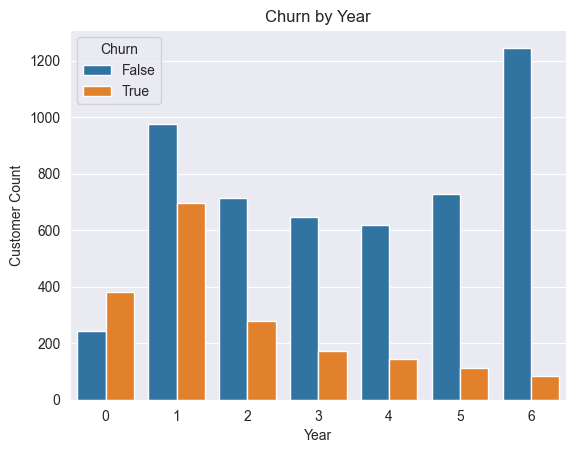

In [19]:
df["tenure_group"] = df["Tenure"].apply(lambda x: months2years_modified_floor(x))

df["tenure_group"].value_counts()

sns.countplot(x="tenure_group", hue="Churn", data=df)
plt.xlabel('Year')
plt.ylabel('Customer Count')
plt.title('Churn by Year')

Text(0.5, 1.0, 'Churn by Year')

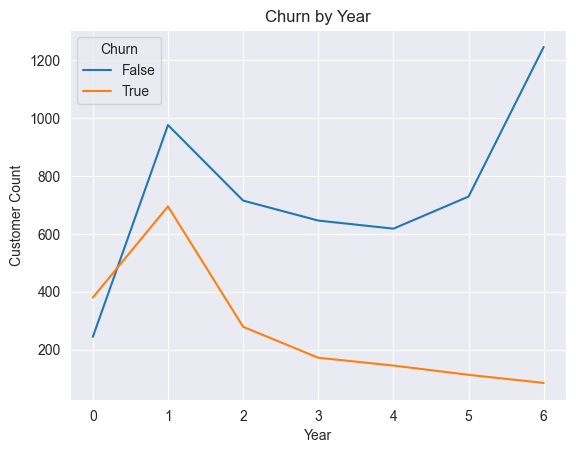

In [20]:
counts_df = pd.DataFrame(df.groupby(['tenure_group', 'Churn']).size().reset_index(name='counts'))

sns.lineplot(x="tenure_group", y="counts", hue="Churn", data=counts_df)
plt.xlabel('Year')
plt.ylabel('Customer Count')
plt.title('Churn by Year')

When viewing the data by year, it appears evident most churn happen in year 1, followed by year zero.
This could lead to thoughts about customers leaving at the end of their contract and additional incentives
may need to be added to retain customers.

However, reevaluate the churn by tenure month and it is apparent most of the churn is happening in the first month and a significant portion by the fifth month.

Using a boxplot can provide a different perspective with churn.

#### Boxplots can offer a different way to visualize data

# Create the box plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.boxplot(x='Churn', y='Tenure', data=df, hue='Churn', dodge=False, legend=True)

plt.title("Churn by Tenure")
plt.xlabel('churned?: 0 = False, 1 = True', fontsize=12)
plt.ylabel('subscription age in monthss', fontsize=12)

plt.show()

#### Most customers churn early in the process.
The median line displays 50% has churned between 0 and 10 months.

## Customer Churn Survival Analysis - Statistical Methods

## Non-Parametric Methods 

In [21]:
# Importing required libraries

from scipy.stats import norm
import statsmodels.api as st
import lifelines
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

#### Data Preparation 

In [22]:
df.Churn = labelencoder.fit_transform(df.Churn)
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [23]:
eventvar = df['Churn']
timevar = df['Tenure']

In [24]:
# Performing dummy encoding for categorical variables

categorical = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(df, columns=categorical, drop_first=True)

survivaldata.drop(['Tenure', 'Churn', 'tenure_group'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)

survivaldata.head()

,MonthlyCharges,TotalCharges,Gender_Male,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,MultipleLines_No phone service,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingMovies_True,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,False,False,True,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1.0
1,56.95,1889.50,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1.0
2,53.85,108.15,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,1.0
3,42.30,1840.75,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,1.0
4,70.70,151.65,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,1.0


### Kaplan Meier Curve

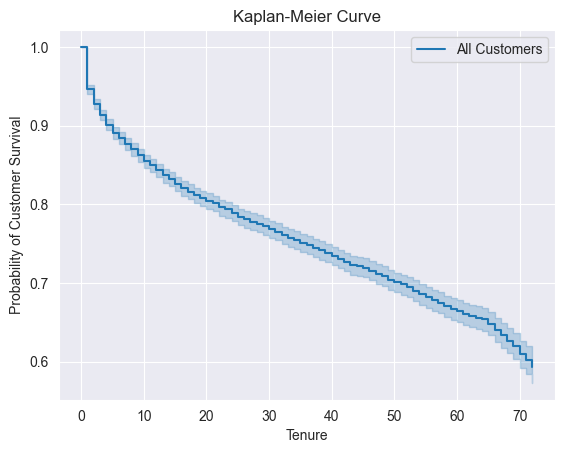

In [25]:
#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()

#Calculate the K-M curve for all groups
kmf.fit(timevar, event_observed=eventvar, label = "All Customers")

#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

#### Interpretations

The below function gives the probability of surviving past time(t) <br>
For example, probability of surviving past timeline(3 - months) is 0.913!

In [26]:
kmf.survival_function_

,All Customers
timeline,
0.0,1.000000
1.0,0.946046
2.0,0.927918
3.0,0.913806
4.0,0.901125
...,...
68.0,0.626914
69.0,0.620191
70.0,0.609711


## Kaplan Meier Curves stratified by variables

### Gender

In [27]:
survivaldata

,MonthlyCharges,TotalCharges,Gender_Male,SeniorCitizen_True,Partner_True,Dependents_True,PhoneService_True,MultipleLines_True,MultipleLines_No phone service,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingMovies_True,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_True,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,False,False,True,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1.0
1,56.95,1889.50,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1.0
2,53.85,108.15,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,1.0
3,42.30,1840.75,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,1.0
4,70.70,151.65,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,True,False,True,True,True,True,False,False,...,False,True,False,True,False,True,False,False,True,1.0
7039,103.20,7362.90,False,False,True,True,True,True,False,True,...,False,True,False,True,False,True,True,False,False,1.0
7040,29.60,346.45,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1.0
7041,74.40,306.60,True,True,True,False,True,True,False,True,...,False,False,False,False,False,True,False,False,True,1.0


### Interpretations
WHen Kaplan Meier curves diverge (visually) it can be a sign of a statistically significant difference.   
The log-rank test calculates a p-value of <0.005 and -log2(-value) quantifies the difference displayed (generally).

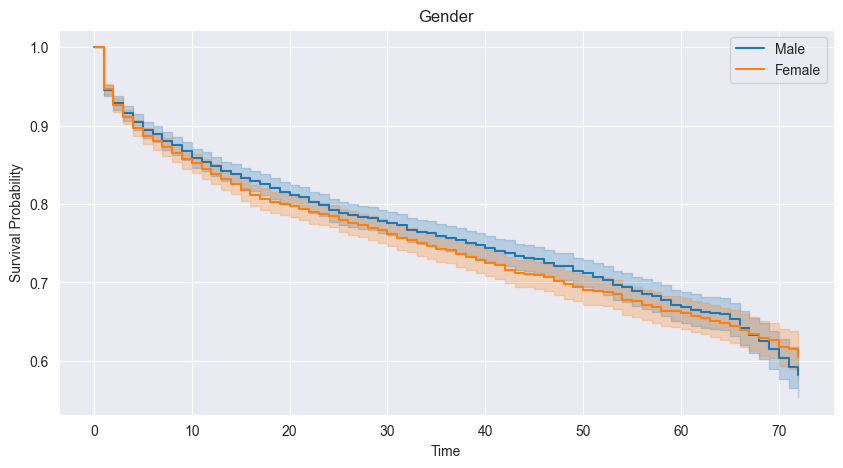

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.10

Survival by Gender
The Kaplan Meier curves displayed are not statistically significant
Survival probabilities p-value of 0.4677 is not statistically significant


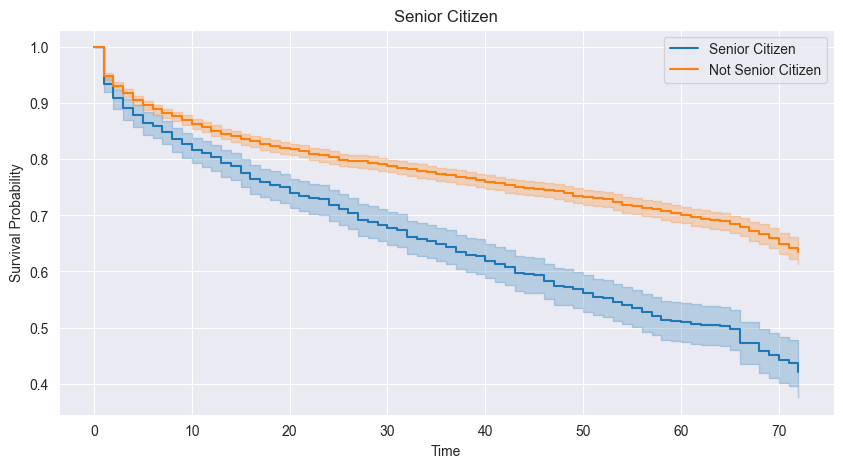

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.64 <0.005     82.82

Survival by Senior Citizen
The Kaplan Meier curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)


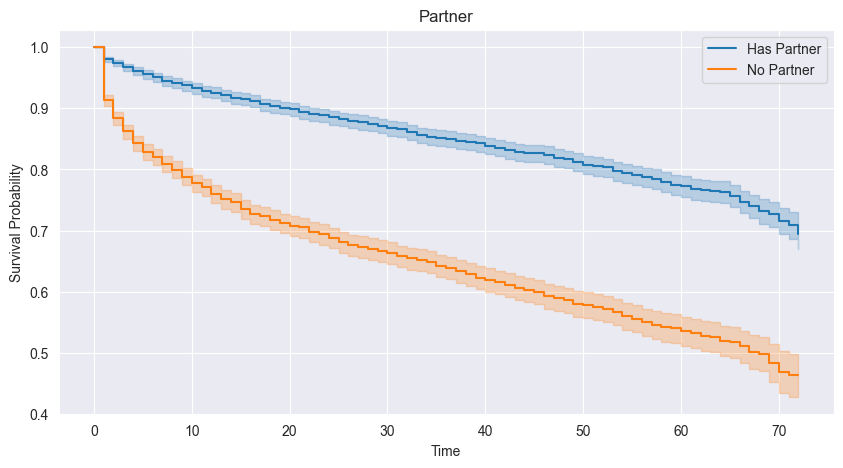

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.92 <0.005    310.49

Survival by Partner
The Kaplan Meier curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)


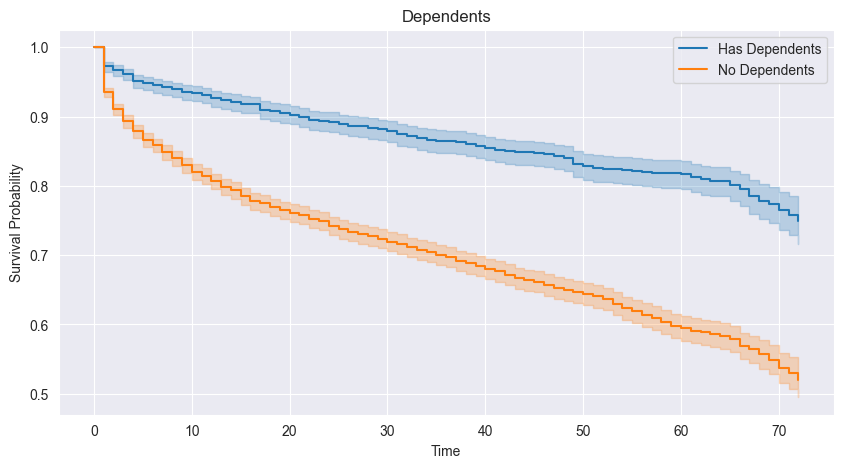

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         233.23 <0.005    172.51

Survival by Dependents
The Kaplan Meier curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)


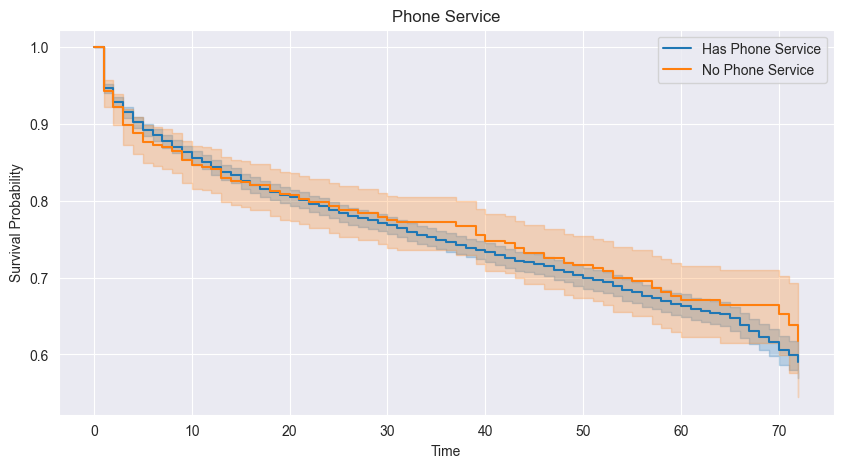

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.44 0.51      0.97

Survival by Phone Service
The Kaplan Meier curves displayed are not statistically significant
Survival probabilities p-value of 0.5091 is not statistically significant


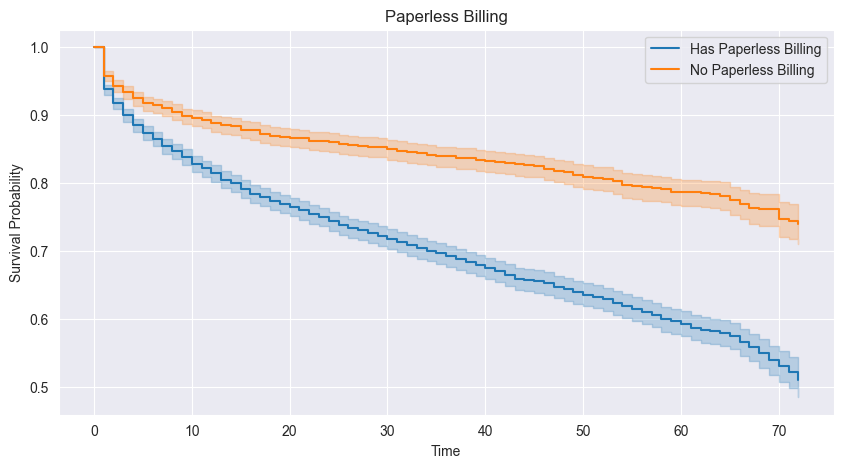

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.74 <0.005    140.99

Survival by Paperless Billing
The Kaplan Meier curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)

The -log3(p) values range from 189.74 to 189.74
The largest -log2(p) value of 189.74 indicates Paperless Billing has the strongest correlation with churn
The smallest -log2(p) value of 189.74 indicates Paperless Billing has the smallest correlation with churn


In [28]:
# list of columns where data is True or False
survival_columns = [
    {
        'column_name': 'Gender_Male', 
        'label1': 'Male',
        'label2': 'Female',
        'title': 'Gender',
        'log2_Intrepretations': '-log2(p)=1.10; Larger values correspond to the strength of evidence against the null hypothesis.'
    },
    {
        'column_name': 'SeniorCitizen_True', 
        'label1': 'Senior Citizen',
        'label2': 'Not Senior Citizen',
        'title': 'Senior Citizen',
        'log2_Intrepretations': '-log2(p)=82.82; Larger values correspond to the strength of evidence against the null hypothesis.'
    },
    {
        'column_name': 'Partner_True', 
        'label1': 'Has Partner',
        'label2': 'No Partner',
        'title': 'Partner',
        'log2_Intrepretations': '-log2(p)=310.49; Larger values correspond to the strength of evidence against the null hypothesis.'
    },
    {
        'column_name': 'Dependents_True', 
        'label1': 'Has Dependents',
        'label2': 'No Dependents',
        'title': 'Dependents',
        'log2_Intrepretations': '-log2(p)=172.51; Larger values correspond to the strength of evidence against the null hypothesis.'
    },
    {
        'column_name': 'PhoneService_True', 
        'label1': 'Has Phone Service',
        'label2': 'No Phone Service',
        'title': 'Phone Service',
        'log2_Intrepretations': '-log2(p)=0.97; Larger values correspond to the strength of evidence against the null hypothesis.'
    },
    {
        'column_name': 'PaperlessBilling_True', 
        'label1': 'Has Paperless Billing',
        'label2': 'No Paperless Billing',
        'title': 'Paperless Billing',
        'log2_Intrepretations': '-log2(p)=140.99; Larger values correspond to the strength of evidence against the null hypothesis.'
    }
]

for item in survival_columns:

    fig, axes = plt.subplots(figsize=(10, 5))

    value1 = (survivaldata[item['column_name']] == True)
    value2 = (survivaldata[item['column_name']] == False)

    kmf.fit(timevar[value1], event_observed=eventvar[value1], label=item['label1'])
    kmf.plot(ax=axes)
    
    kmf.fit(timevar[value2], event_observed=eventvar[value2], label=item['label2'])
    kmf.plot(ax=axes)

    title = item['title']
    axes.set_title(title)
    axes.set_ylabel('Survival Probability')
    axes.set_xlabel('Time')
    
    plt.show()
    
    log_rank_result = logrank_test(timevar[value1], timevar[value2], event_observed_A=eventvar[value1], event_observed_B=eventvar[value2])
    log_rank_result.print_summary()

    # Add significance note
    alpha = 0.05  # Common significance level
    if log_rank_result.p_value < alpha:
        km_interpretation = 'The Kaplan Meier curves displays a statistically significant difference'
        log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
    else:
        km_interpretation = 'The Kaplan Meier curves displayed are not statistically significant'
        log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

    print(f"Survival by {title}")
    print(km_interpretation)
    print(log_rank_intrepretation)

    max_test_statistic = -1
    max_column_name = None    
    min_test_statistic = 1000
    min_column_name = None
    # Iterate through the survival columns and generate plots + tests
    if log_rank_result.test_statistic > max_test_statistic:
        max_test_statistic = log_rank_result.test_statistic
        max_column_name = item['title']
    if log_rank_result.test_statistic < min_test_statistic:
        min_test_statistic = log_rank_result.test_statistic
        min_column_name = item['title']


print(f"\nThe -log3(p) values range from {min_test_statistic:.2f} to {max_test_statistic:.2f}")
print(f"The largest -log2(p) value of {max_test_statistic:.2f} indicates {max_column_name} has the strongest correlation with churn")
print(f"The smallest -log2(p) value of {min_test_statistic:.2f} indicates {min_column_name} has the smallest correlation with churn")


### TODO
Create a KM function for the above code to simplify that could also be used for more than two variables.
Accept a variable number of groups OR calculate the categorical data on-the-fly and look through to add to the KM curve.
Then repeat and create a function to perform the log_rank tests with more than two groups.

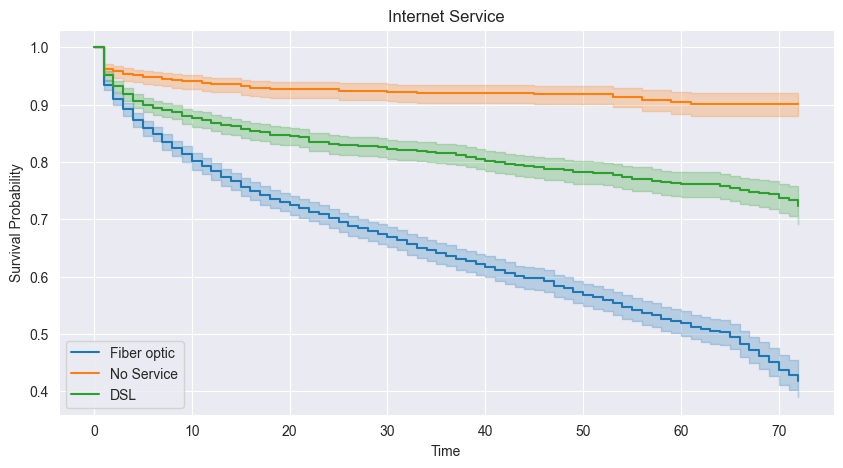

Fiber Optic and No Service test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00


Fiber Optic and DSL test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
       11082.63 <0.005       inf


No Service and DSL test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        8142.89 <0.005       inf


Survival by Internet Service
The Kaplan Meier Fiber Optic and No Service curves displayed are not statistically significant
Survival probabilities p-value of 0.0000 is not statistically significant
The Kaplan Meier Fiber Optic and DSL curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)
The Kaplan Meier No Service and DSL curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)


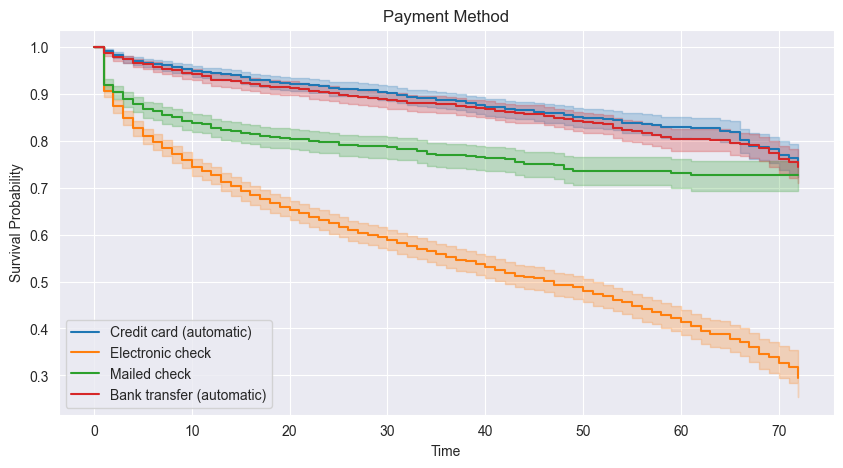

Credit card (automatic) and Electronic check test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        7411.98 <0.005       inf


Credit card (automatic) and Mailed check test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        2079.99 <0.005       inf


Credit card (automatic) and Bank transfer (automatic) test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00


Electronic check and Mailed check test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        2809.83 <0.005       inf


Survival by Payment Method
The Kaplan Meier Credit card (automatic) and Electronic check curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)
The Kaplan Meier Credit card (automatic) and Mailed check curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)
The Kaplan Meier Electronic check and Mailed check curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)


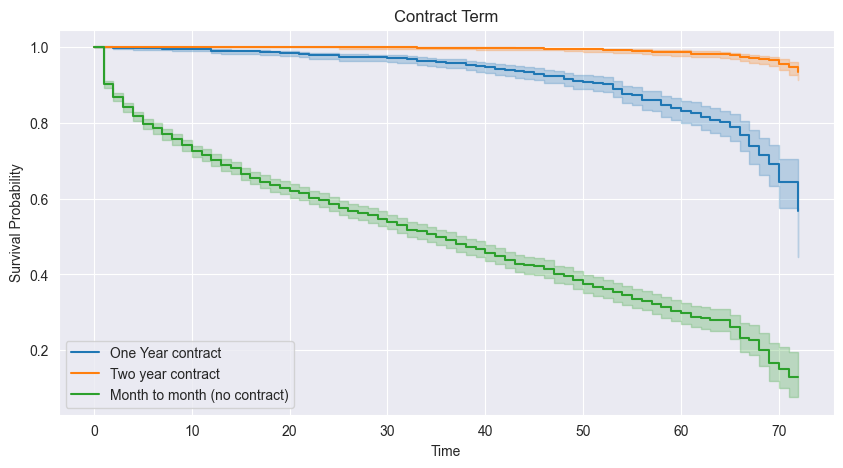

One Year contract and Two year contract test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1995.03 <0.005       inf


One Year contract and Month to month (no contract) test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1424.64 <0.005   1033.23


Two year contract and Month to month (no contract) test


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        5540.60 <0.005       inf


Survival by Contract Term
The Kaplan Meier One Year contract and Two year contract  curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)
The Kaplan Meier One Year contract and Month to month (no contract) curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)
The Kaplan Meier Two year contract and Month to month (no contract) curves displays a statistically significant difference
Survival probabilities p-value of <0.0000 is statistically significant (p < 0.05)

The -log3(p) values range from 0.00 to 11082.63
The largest -log2(p) value of 11082.63 indicates Paperless Billing has the strongest correlation with churn
The smallest -log2(p) value of 0.00 indicates Paperless Billing has the smallest correlation with churn


In [29]:
##
## Internet Service
##
fig, axes = plt.subplots(figsize=(10, 5))

group1 = survivaldata['InternetService_Fiber optic'] == 1
group2 = survivaldata['InternetService_No'] == 1
group3 = (survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0)

kmf.fit(timevar[group1], event_observed=eventvar[group1], label="Fiber optic")
kmf.plot(ax=axes)

kmf.fit(timevar[group2], event_observed=eventvar[group2], label="No Service")
kmf.plot(ax=axes)

kmf.fit(timevar[group3], event_observed=eventvar[group3], label="DSL")
kmf.plot(ax=axes)

title = 'Internet Service'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()

results_1_2 = logrank_test(group1[timevar], group2[timevar], event_observed_A=group1[eventvar], event_observed_B=group2[eventvar])
results_1_3 = logrank_test(group1[timevar], group3[timevar], event_observed_A=group1[eventvar], event_observed_B=group3[eventvar])
results_2_3 = logrank_test(group2[timevar], group3[timevar], event_observed_A=group2[eventvar], event_observed_B=group3[eventvar])

# Print results for each pair
print(f"Fiber Optic and No Service test")
results_1_2.print_summary()
print(f"\nFiber Optic and DSL test")
results_1_3.print_summary()
print(f"\nNo Service and DSL test")
results_2_3.print_summary()

print(f"\nSurvival by {title}")

# Add significance note
alpha = 0.05  # Common significance level
if results_1_2.p_value < alpha:
    km_interpretation = 'The Kaplan Meier Fiber Optic and No Service curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier Fiber Optic and No Service curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_1_2.test_statistic > max_test_statistic:
    max_test_statistic = results_1_2.test_statistic
    max_column_name = item['title']
if results_1_2.test_statistic < min_test_statistic:
    min_test_statistic = results_1_2.test_statistic
    min_column_name = item['title']


# Add significance note
alpha = 0.05  # Common significance level
if results_1_3.p_value < alpha:
    km_interpretation = 'The Kaplan Meier Fiber Optic and DSL curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier Fiber Optic and DSL curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_1_3.test_statistic > max_test_statistic:
    max_test_statistic = results_1_3.test_statistic
    max_column_name = item['title']
if results_1_3.test_statistic < min_test_statistic:
    min_test_statistic = results_1_3.test_statistic
    min_column_name = item['title']


# Add significance note
alpha = 0.05  # Common significance level
if results_2_3.p_value < alpha:
    km_interpretation = 'The Kaplan Meier No Service and DSL curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier No Service and DSL curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_2_3.test_statistic > max_test_statistic:
    max_test_statistic = results_2_3.test_statistic
    max_column_name = item['title']
if results_2_3.test_statistic < min_test_statistic:
    min_test_statistic = results_2_3.test_statistic
    min_column_name = item['title']


##
## Payment Method
##
fig, axes = plt.subplots(figsize=(10, 5))

group1 = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
group2 = (survivaldata['PaymentMethod_Electronic check'] == 1)
group3 = (survivaldata['PaymentMethod_Mailed check'] == 1)
group4 = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

kmf.fit(timevar[group1], event_observed=eventvar[group1], label="Credit card (automatic)")
kmf.plot(ax=axes)

kmf.fit(timevar[group2], event_observed=eventvar[group2], label="Electronic check")
kmf.plot(ax=axes)

kmf.fit(timevar[group3], event_observed=eventvar[group3], label="Mailed check")
kmf.plot(ax=axes)

kmf.fit(timevar[group4], event_observed=eventvar[group4], label="Bank transfer (automatic)")
kmf.plot(ax=axes)

title = 'Payment Method'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()

results_1_2 = logrank_test(group1[timevar], group2[timevar], event_observed_A=group1[eventvar], event_observed_B=group2[eventvar])
results_1_3 = logrank_test(group1[timevar], group3[timevar], event_observed_A=group1[eventvar], event_observed_B=group3[eventvar])
results_1_4 = logrank_test(group1[timevar], group4[timevar], event_observed_A=group1[eventvar], event_observed_B=group4[eventvar])
results_2_3 = logrank_test(group2[timevar], group3[timevar], event_observed_A=group2[eventvar], event_observed_B=group3[eventvar])

# Print results for each pair
print(f"Credit card (automatic) and Electronic check test")
results_1_2.print_summary()
print(f"\nCredit card (automatic) and Mailed check test")
results_1_3.print_summary()
print(f"\nCredit card (automatic) and Bank transfer (automatic) test")
results_1_4.print_summary()
print(f"\nElectronic check and Mailed check test")
results_2_3.print_summary()

print(f"\nSurvival by {title}")

# Add significance note
alpha = 0.05  # Common significance level
if results_1_2.p_value < alpha:
    km_interpretation = 'The Kaplan Meier Credit card (automatic) and Electronic check curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier Credit card (automatic) and Electronic check curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_1_2.test_statistic > max_test_statistic:
    max_test_statistic = results_1_2.test_statistic
    max_column_name = item['title']
if results_1_2.test_statistic < min_test_statistic:
    min_test_statistic = results_1_2.test_statistic
    min_column_name = item['title']


# Add significance note
alpha = 0.05  # Common significance level
if results_1_3.p_value < alpha:
    km_interpretation = 'The Kaplan Meier Credit card (automatic) and Mailed check curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier Credit card (automatic) and Mailed check curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_1_3.test_statistic > max_test_statistic:
    max_test_statistic = results_1_3.test_statistic
    max_column_name = item['title']
if results_1_3.test_statistic < min_test_statistic:
    min_test_statistic = results_1_3.test_statistic
    min_column_name = item['title']


# Add significance note
alpha = 0.05  # Common significance level
if results_2_3.p_value < alpha:
    km_interpretation = 'The Kaplan Meier Electronic check and Mailed check curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier Electronic check and Mailed check curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_2_3.test_statistic > max_test_statistic:
    max_test_statistic = results_2_3.test_statistic
    max_column_name = item['title']
if results_2_3.test_statistic < min_test_statistic:
    min_test_statistic = results_2_3.test_statistic
    min_column_name = item['title']

##
## Contract Term
##
fig, axes = plt.subplots(figsize=(10, 5))

group1 = survivaldata['Contract_One year'] == 1
group2 = survivaldata['Contract_Two year'] == 1
group3 = (survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0)
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0))

kmf.fit(timevar[group1], event_observed=eventvar[group1], label="One Year contract")
kmf.plot(ax=axes)

kmf.fit(timevar[group2], event_observed=eventvar[group2], label="Two year contract")
kmf.plot(ax=axes)

kmf.fit(timevar[group3], event_observed=eventvar[group3], label="Month to month (no contract)")
kmf.plot(ax=axes)

title = 'Contract Term'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()

results_1_2 = logrank_test(group1[timevar], group2[timevar], event_observed_A=group1[eventvar], event_observed_B=group2[eventvar])
results_1_3 = logrank_test(group1[timevar], group3[timevar], event_observed_A=group1[eventvar], event_observed_B=group3[eventvar])
results_2_3 = logrank_test(group2[timevar], group3[timevar], event_observed_A=group2[eventvar], event_observed_B=group3[eventvar])

# Print results for each pair
print(f"One Year contract and Two year contract test")
results_1_2.print_summary()
print(f"\nOne Year contract and Month to month (no contract) test")
results_1_3.print_summary()
print(f"\nTwo year contract and Month to month (no contract) test")
results_2_3.print_summary()

print(f"\nSurvival by {title}")

# Add significance note
alpha = 0.05  # Common significance level
if results_1_2.p_value < alpha:
    km_interpretation = 'The Kaplan Meier One Year contract and Two year contract  curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier One Year contract and Two year contract  curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_1_2.test_statistic > max_test_statistic:
    max_test_statistic = results_1_2.test_statistic
    max_column_name = item['title']
if results_1_2.test_statistic < min_test_statistic:
    min_test_statistic = results_1_2.test_statistic
    min_column_name = item['title']


# Add significance note
alpha = 0.05  # Common significance level
if results_1_3.p_value < alpha:
    km_interpretation = 'The Kaplan Meier One Year contract and Month to month (no contract) curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier One Year contract and Month to month (no contract) curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_1_3.test_statistic > max_test_statistic:
    max_test_statistic = results_1_3.test_statistic
    max_column_name = item['title']
if results_1_3.test_statistic < min_test_statistic:
    min_test_statistic = results_1_3.test_statistic
    min_column_name = item['title']


# Add significance note
alpha = 0.05  # Common significance level
if results_2_3.p_value < alpha:
    km_interpretation = 'The Kaplan Meier Two year contract and Month to month (no contract) curves displays a statistically significant difference'
    log_rank_intrepretation = f"Survival probabilities p-value of <{log_rank_result.p_value:.4f} is statistically significant (p < 0.05)"
else:
    km_interpretation = 'The Kaplan Meier Two year contract and Month to month (no contract) curves displayed are not statistically significant'
    log_rank_intrepretation = f"Survival probabilities p-value of {log_rank_result.p_value:.4f} is not statistically significant"

print(km_interpretation)
print(log_rank_intrepretation)

# Iterate through the survival columns and generate plots + tests
if results_2_3.test_statistic > max_test_statistic:
    max_test_statistic = results_2_3.test_statistic
    max_column_name = item['title']
if results_2_3.test_statistic < min_test_statistic:
    min_test_statistic = results_2_3.test_statistic
    min_column_name = item['title']


print(f"\nThe -log3(p) values range from {min_test_statistic:.2f} to {max_test_statistic:.2f}")
print(f"The largest -log2(p) value of {max_test_statistic:.2f} indicates {max_column_name} has the strongest correlation with churn")
print(f"The smallest -log2(p) value of {min_test_statistic:.2f} indicates {min_column_name} has the smallest correlation with churn")

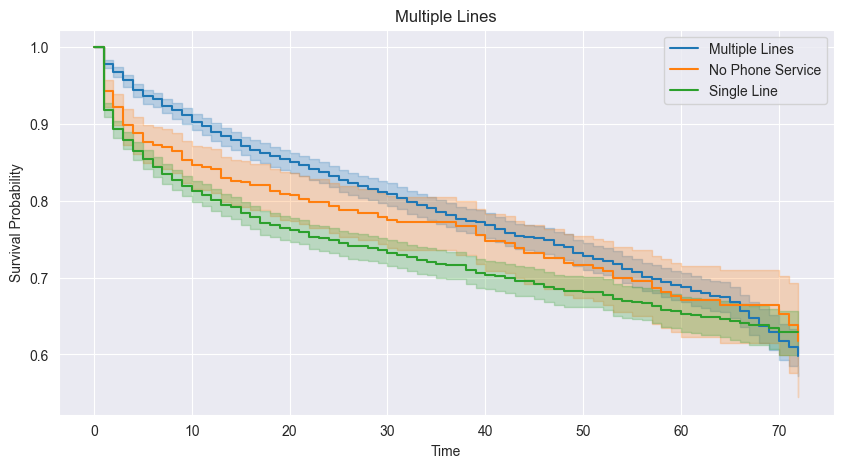

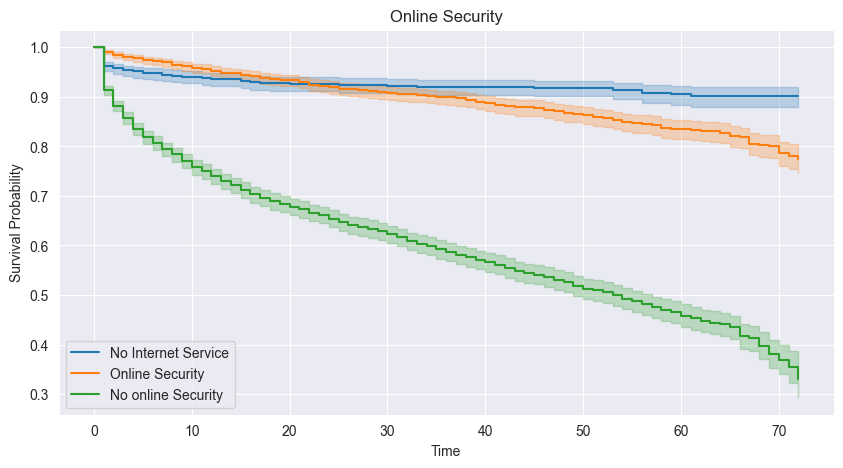

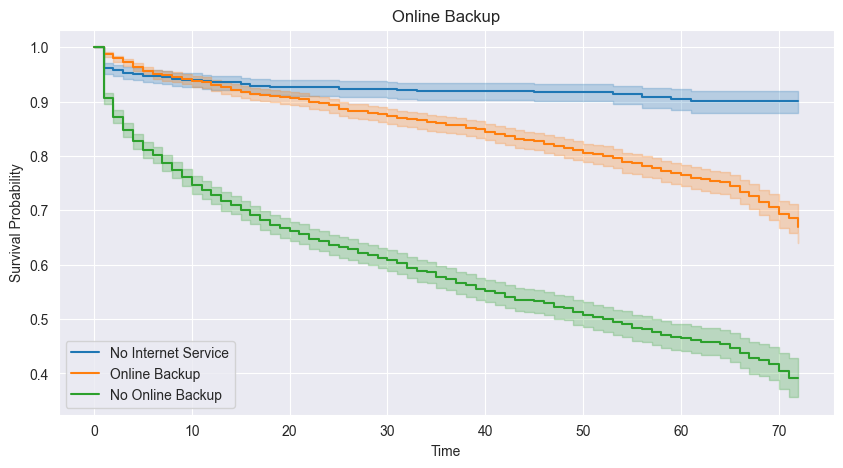

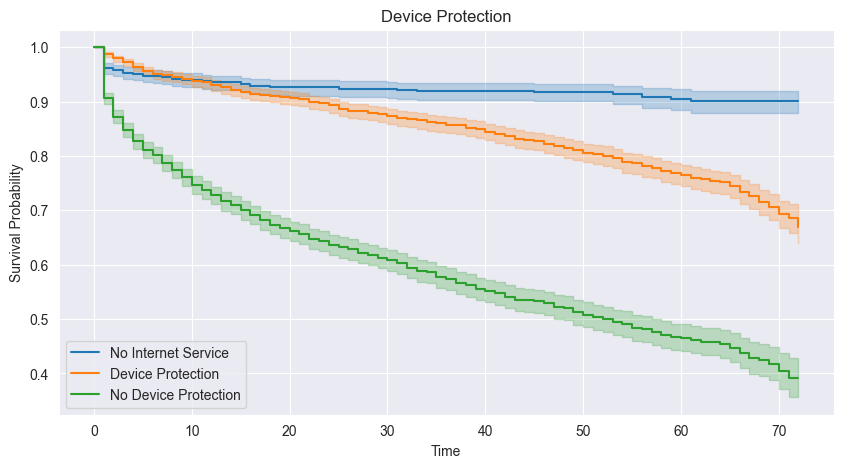

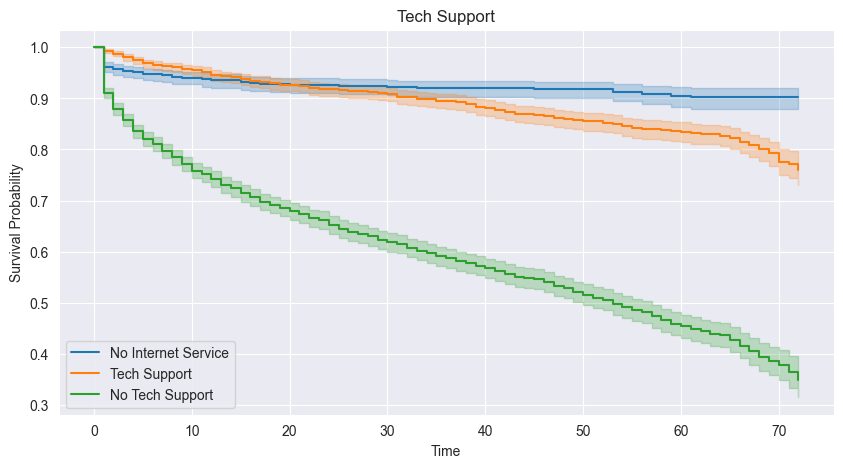

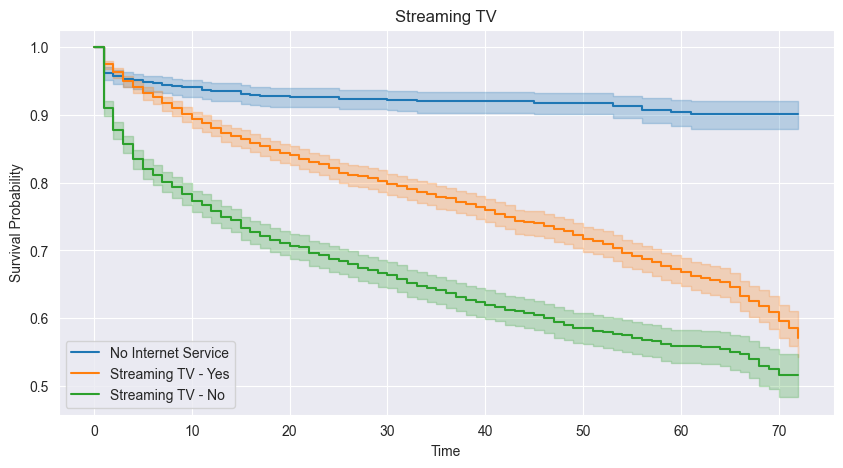

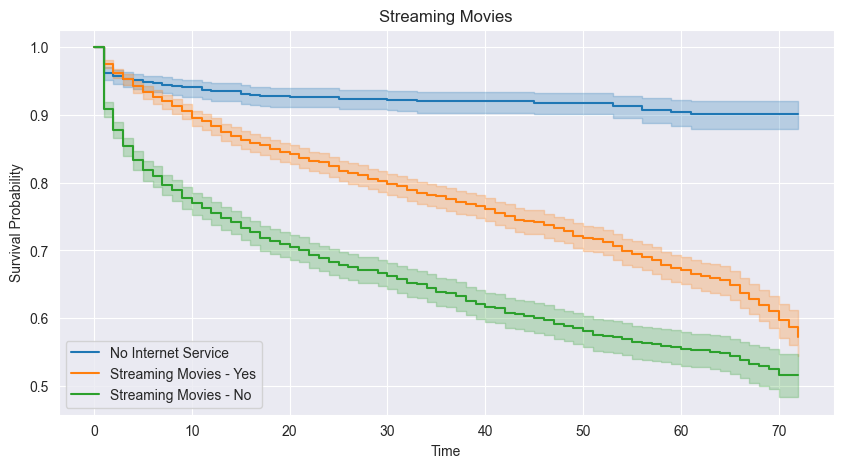

In [30]:
fig, axes = plt.subplots(figsize=(10, 5))

# Multiple Lines
mult_yes = (survivaldata['MultipleLines_True'] == 1)
no_ph_ser = (survivaldata['MultipleLines_No phone service'] == 1)
single_line = ((survivaldata['MultipleLines_True'] == 0) & (survivaldata['MultipleLines_No phone service'] == 0))

kmf.fit(timevar[mult_yes], event_observed=eventvar[mult_yes], label="Multiple Lines")
kmf.plot(ax=axes)

kmf.fit(timevar[no_ph_ser], event_observed=eventvar[no_ph_ser], label="No Phone Service")
kmf.plot(ax=axes)

kmf.fit(timevar[single_line], event_observed=eventvar[single_line], label="Single Line")
kmf.plot(ax=axes)

title = 'Multiple Lines'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()


# Online Security
fig, axes = plt.subplots(figsize=(10, 5))

no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_True'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) & (survivaldata['OnlineSecurity_True'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes)

kmf.fit(timevar[onlineSecurity], event_observed=eventvar[onlineSecurity], label="Online Security")
kmf.plot(ax=axes)

kmf.fit(timevar[no_onlineSecurity], event_observed=eventvar[no_onlineSecurity], label="No online Security")
kmf.plot(ax=axes)

title = 'Online Security'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()


# Online Backup
fig, axes = plt.subplots(figsize=(10, 5))

no_internetService = (survivaldata['OnlineBackup_No internet service'] == 1)
backup = (survivaldata['OnlineBackup_True'] == 1)
no_backup = ((survivaldata['OnlineBackup_True'] == 0) & (survivaldata['OnlineBackup_No internet service'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes)

kmf.fit(timevar[backup], event_observed=eventvar[backup], label="Online Backup")
kmf.plot(ax=axes)

kmf.fit(timevar[no_backup], event_observed=eventvar[no_backup], label="No Online Backup")
kmf.plot(ax=axes)

title = 'Online Backup'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()


# Device Protection 
fig, axes = plt.subplots(figsize=(10, 5))

no_internetService = (survivaldata['DeviceProtection_No internet service'] == 1)
dp = (survivaldata['DeviceProtection_True'] == 1)
no_dp = ((survivaldata['DeviceProtection_True'] == 0) & (survivaldata['DeviceProtection_No internet service'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes)

kmf.fit(timevar[backup], event_observed=eventvar[backup], label="Device Protection")
kmf.plot(ax=axes)

kmf.fit(timevar[no_backup], event_observed=eventvar[no_backup], label="No Device Protection")
kmf.plot(ax=axes)

title = 'Device Protection'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()


# Tech Support
fig, axes = plt.subplots(figsize=(10, 5))

no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_True'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) & (survivaldata['TechSupport_True'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes)

kmf.fit(timevar[TechSupport], event_observed=eventvar[TechSupport], label="Tech Support")
kmf.plot(ax=axes)

kmf.fit(timevar[no_TechSupport], event_observed=eventvar[no_TechSupport], label="No Tech Support")
kmf.plot(ax=axes)

title = 'Tech Support'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()


# Streaming TV
fig, axes = plt.subplots(figsize=(10, 5))

no_internetService = (survivaldata['StreamingTV_No internet service'] == 1)
strtv = (survivaldata['StreamingTV_True'] == 1)
no_strtv = ((survivaldata['StreamingTV_No internet service'] == 0) & (survivaldata['StreamingTV_True'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes)

kmf.fit(timevar[strtv], event_observed=eventvar[strtv], label="Streaming TV - Yes")
kmf.plot(ax=axes)

kmf.fit(timevar[no_strtv], event_observed=eventvar[no_strtv], label="Streaming TV - No")
kmf.plot(ax=axes)

title = 'Streaming TV'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()


# Streaming Movies  
fig, axes = plt.subplots(figsize=(10, 5))

no_internetService = (survivaldata['StreamingMovies_No internet service'] == 1)
strm = (survivaldata['StreamingMovies_True'] == 1)
no_strm = ((survivaldata['StreamingMovies_No internet service'] == 0) & (survivaldata['StreamingMovies_True'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes)

kmf.fit(timevar[strm], event_observed=eventvar[strm], label="Streaming Movies - Yes")
kmf.plot(ax=axes)

kmf.fit(timevar[no_strm], event_observed=eventvar[no_strm], label="Streaming Movies - No")
kmf.plot(ax=axes)

title = 'Streaming Movies'
axes.set_title(title)
axes.set_ylabel('Survival Probability')
axes.set_xlabel('Time')
    
plt.show()

#### Similar tests can be performed on other variables to test their statistical significance.

## Semi-Parametric Methods

## Cox Proportional Hazards Model 

In [31]:
data = df

In [32]:
categories = ["Churn",
              "Gender",
              "SeniorCitizen",
              "Partner",
              "Dependents",
              "PhoneService",
              "MultipleLines",
              "InternetService",
              "OnlineSecurity",
              "OnlineBackup",
              "DeviceProtection",
              "TechSupport",
              "StreamingTV",
              "StreamingMovies",
              "Contract",
              "PaperlessBilling",
              "PaymentMethod"]              

In [33]:
df_cat = pd.get_dummies(data, columns=categories, drop_first=True)

In [34]:
cph = CoxPHFitter()
cph.fit(df_cat, duration_col='Tenure', event_col='Churn_1')
###
### an error is expected!
###
### Halts due to a possibility of high multicollinearity among variables. 

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

### Create a heatmap to demonstrate the high collineraty

It's evident that there's an extra factor for the variables associated with the company's internet services; high-collineraty.   
Other data can be simplified, in this notebook.
For example, OnlineSecurity has 3 levels: 'Yes', 'No' , 'No internet service'.   
Change 'No internet service' to 'No' to reduce complexity.

In [35]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["CustomerID","TotalCharges"], inplace = True, axis = 1)
  
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.Gender = df.Gender.apply(lambda x: 1 if x == "Male" else 0)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'Yes': 1, 'No internet service': 0, 'No': 0})

    categories = ['InternetService', 'Contract', 'PaymentMethod']
    
    df = pd.get_dummies(df, columns = categories, drop_first=True)
    
    return df

In [36]:
df_prep = datapreparation("data/customer_churn_data.csv")

<Axes: >

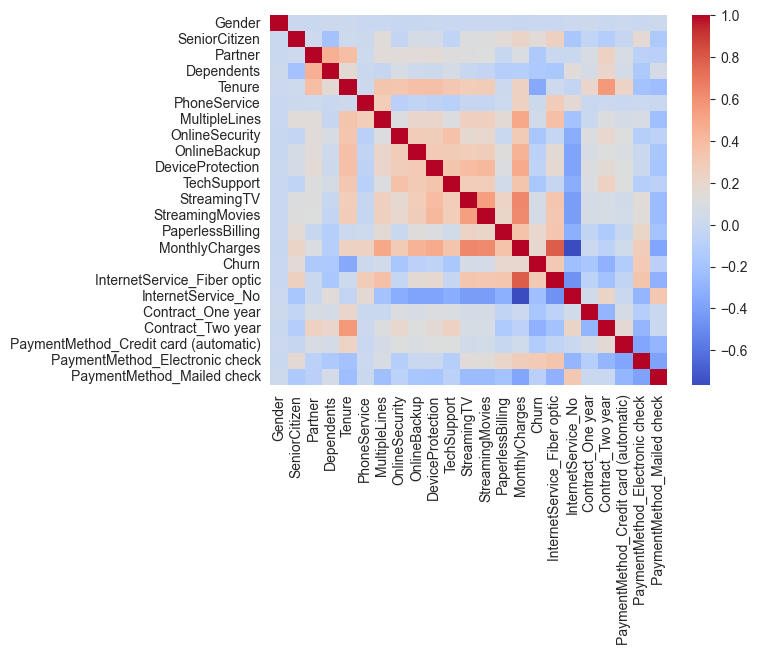

In [37]:
sns.heatmap(df_prep.corr(), 
            cmap='coolwarm', 
            annot=False,
            xticklabels=df_prep.corr().columns, 
            yticklabels=df_prep.corr().columns)

### Fit a cox proportional hazards model

In [38]:
cph = CoxPHFitter()
cph.fit(df_prep, duration_col='Tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'Tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13884.62
         time fit was run = 2024-07-29 16:23:17 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
Gender                                -0.09      0.92      0.05           -0.18            0.01                0.84                1.01
SeniorCitizen                         -0.07      0.93      0.06           -0.18            0.04                0.83                1.04
Partner                               -0.52      0.60      0.06           -0.63           -0.41                0.53                0.66
Dependents                            -0.05      0.95      0.07           -0.19            0.08                0.83                1.08
PhoneService                           0.25      1.29      0.47           -0.67            1.18                0.51                3.25
MultipleLines                         -0.42      0.66      0.13           -0.67           -0.17                0.51                0.84
OnlineSecurity                        -0.61      0.54      0.13           -0.87           -0.35                0.42                0.70
OnlineBackup                          -0.61      0.54      0.13           -0.86           -0.36                0.42                0.69
DeviceProtection                      -0.28      0.75      0.13           -0.53           -0.04                0.59                0.96
TechSupport                           -0.37      0.69      0.13           -0.63           -0.11                0.53                0.90
StreamingTV                            0.04      1.04      0.24           -0.42            0.50                0.66                1.66
StreamingMovies                       -0.05      0.95      0.24           -0.52            0.41                0.60                1.50
PaperlessBilling                       0.18      1.20      0.06            0.07            0.29                1.07                1.34
MonthlyCharges                        -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
InternetService_Fiber optic            0.59      1.80      0.58           -0.54            1.71                0.58                5.55
InternetService_No                    -1.30      0.27      0.59           -2.45           -0.15                0.09                0.86
Contract_One year                     -1.62      0.20      0.09           -1.79           -1.44                0.17                0.24
Contract_Two year                     -3.23      0.04      0.16           -3.56           -2.91                0.03                0.05
PaymentMethod_Credit card (automatic) -0.08      0.92      0.09           -0.26            0.09                0.77                1.10
PaymentMethod_Electronic check         0.59      1.80      0.07            0.45            0.73                1.56                2.07
PaymentMethod_Mailed check             0.57      1.76      0.09            0.39            0.74                1.48                2.09

                                       cmp to      z      p  -log2(p)
covariate                                                            
Gender                                   0.00  -1.84   0.07      3.93
SeniorCitizen                            0.00  -1.26   0.21      2.27
Partner                                  0.00  -9.40 <0.005     67.30
Dependents                               0.00  -0.78   0.43      1.20
PhoneService                             0.00   0.54   0.59      0.76
MultipleLines   

In [39]:
cph.concordance_index_.round(2)

0.87

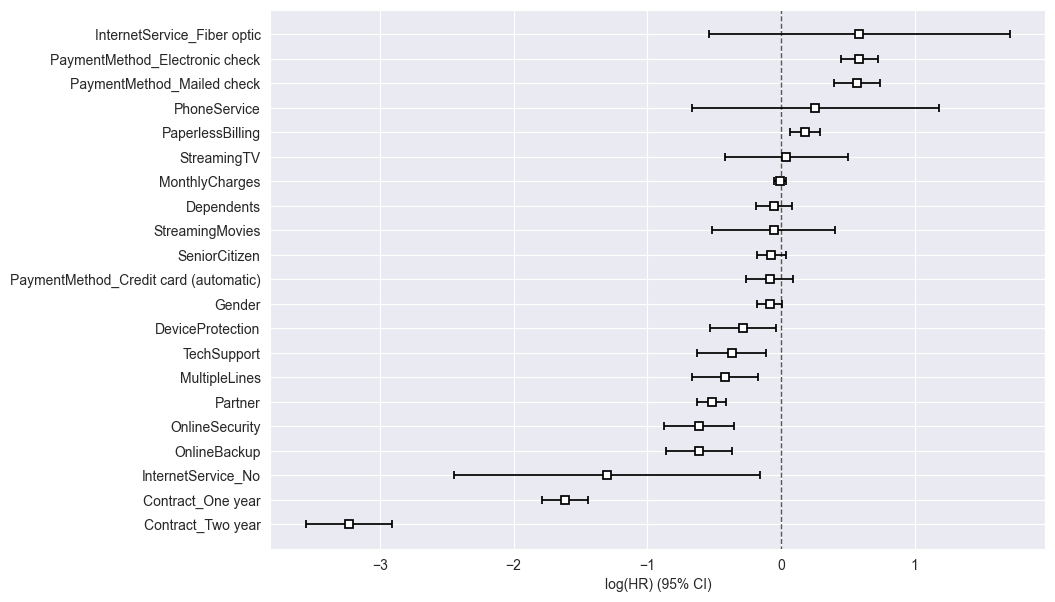

In [40]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

#### Interpretation

The Concordance Index (C-index), also known as the C-statistic, is a metric used to assess the predictive accuracy of models for time-to-event data (survival analysis). It measures how well a model's predicted risk scores align with the actual observed time of the event.

#### Key Concepts:

* <b>Concordant Pairs</b>: A pair of samples is considered concordant if the subject with the higher predicted risk score experiences the event before the subject with the lower risk score. This indicates that the model correctly ranked the individuals in terms of their risk.
* <b>Discordant Pairs</b>: A pair is discordant if the subject with the higher predicted risk score experiences the event after the subject with the lower risk score, indicating the model made an incorrect ranking.
Tied Pairs: Pairs where the predicted risk scores or the event times are the same.

**Concordance Index** <br>
A concordance index of 0.87 indicates the model's ability to accurately rank the survival times of customers. The c-index is interested in the order of the predictions than the predictions themselves.

For example, let A & B have true churn in month 3 and 8 respectively. <br>If the model predicts that A & B churn in month 3 and 8 respectively - the concordance index would be 1. Also, if the model predicts that A & B would churn in month 15 and 16 respectively, the concordance index would still be 1.

As mentioned above, the c - index is only interested in the order of the predictions than the actual survival predictions.

**Hazard Ratios (HR)** <br>
From the plot above all variables having negative log(HR) indicate that the probability of the event(Churn in our case) happening for that variable is less than the baseline model. 

For example, customers subscribed to two-year contracts are exp(log(HR)) times likely to Churn than customers on a monthly plan(baseline model).
In other terms, customers on two-year contracts are 0.04 times likely to Churn than customers on monthly plans.

Similarly, for Internet Service, the baseline model is InternetService = DSL. From the plot above customers who have opted for the company's Fiber Optic are at a risk of churning more than the ones subscribed to the company's fiber optic since the log(HR) is positive for this case.Customers who have not opted for any internet service are at a lesser risk of churning. <br>  This confirms the inference made in EDA that the company's internet service is probably not upto the customer's expectation.

In [41]:
import random 
random.seed(10)
test = df.sample(random_state = np.random.RandomState(10))

The below plots gives us the survival probability and cumulative hazard for a randomly selected sample from the dataset.

## Penalized Cox Models

In [42]:
# Import required libraries
import sksurv
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text") 

In [43]:
regression_df = datapreparation("data/customer_churn_data.csv")

In [44]:
tenure = regression_df['Tenure']
churn = regression_df['Churn']

In [45]:
X = regression_df
X.drop(['Tenure', 'Churn', 'MonthlyCharges'], axis = 1, inplace= True)

In [46]:
Xt = OneHotEncoder().fit_transform(X)
Xt.round(2).head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,0,0,0,1,False,False,False,False,False,True,False
1,1,0,0,0,1,0,1,0,1,0,0,0,0,False,False,True,False,False,False,True
2,1,0,0,0,1,0,1,1,0,0,0,0,1,False,False,False,False,False,False,True
3,1,0,0,0,0,0,1,0,1,1,0,0,0,False,False,True,False,False,False,False
4,0,0,0,0,1,0,0,0,0,0,0,0,1,True,False,False,False,False,True,False


In [47]:
structured_array = np.empty((len(churn),), dtype=[('Churn', bool), ('Tenure', float)])
structured_array['Churn'] = churn.astype(bool)
structured_array['Tenure'] = tenure.astype(float)

### RIDGE

In [48]:
y = structured_array
alphas = 10. ** np.linspace(-4,4, 50)
coefficients = {}

cph = CoxPHSurvivalAnalysis()
for alpha in alphas:
    cph.set_params(alpha=alpha)
    cph.fit(Xt, y)
    key = round(alpha, 5)
    coefficients[key] = cph.coef_

coefficients = (pd.DataFrame
    .from_dict(coefficients)
    .rename_axis(index="feature", columns="alpha")
    .set_index(Xt.columns))


In [49]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(
            alpha_min, coef, name + "   ",
            horizontalalignment="right",
            verticalalignment="center"
        )

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")

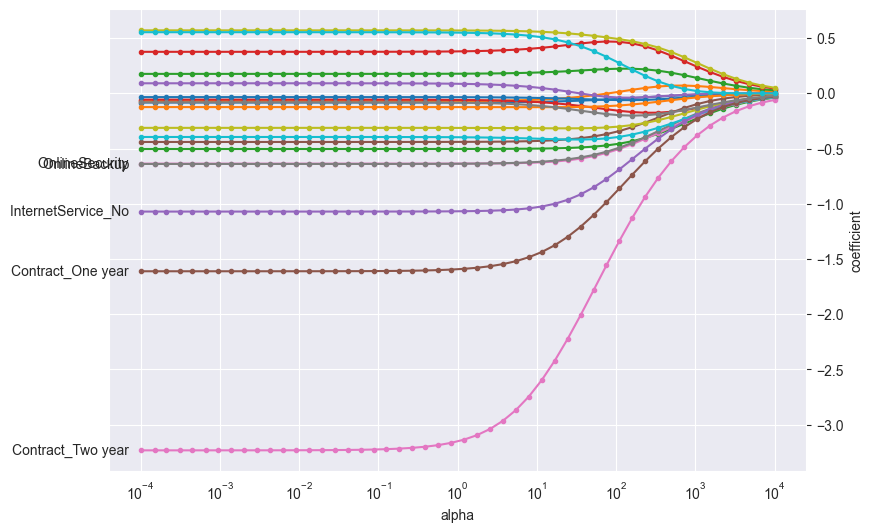

In [50]:
plot_coefficients(coefficients, n_highlight=5)

The Ridge or the L2 regularization technique reduces the values of coefficients on the model. From the above plot, unless the penalty is huge(10^3), the coefficients are not reduced to zero. 

### LASSO

In [51]:
cox_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
cox_lasso.fit(Xt, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

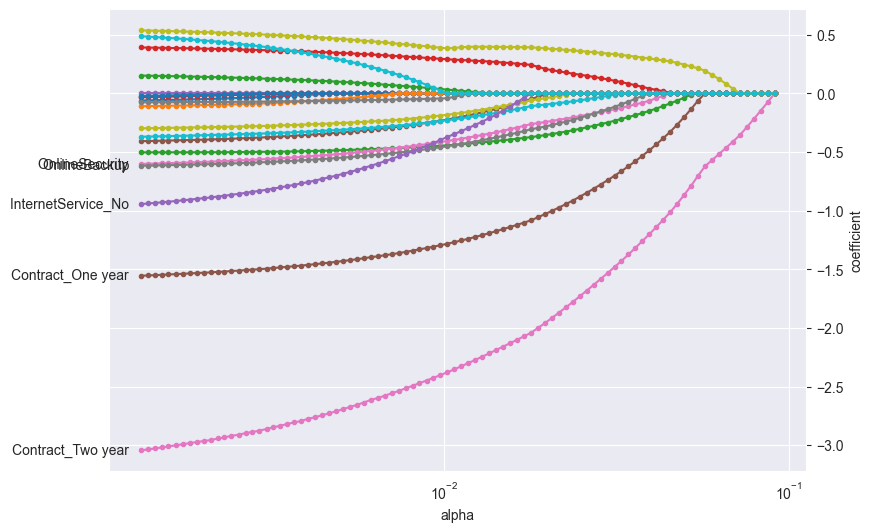

In [52]:
coefficients_lasso = pd.DataFrame(
    cox_lasso.coef_,
    index=Xt.columns,
    columns=np.round(cox_lasso.alphas_, 5)
)

plot_coefficients(coefficients_lasso, n_highlight=5)

The LASSO or the L1 model shrinks the coefficients towards 'zero' and therefore performs variable selection operations as well. As alpha increases from left to right, the variables are shrunk towards zero!

#### Choosing Alpha using Elastic Net

In [53]:
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(Xt, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [54]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1).fit(Xt, y)

cv_results = pd.DataFrame(gcv.cv_results_)

In [55]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

# fig, ax = plt.subplots(figsize=(9, 6))
# ax.plot(alphas, mean)
# ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
# ax.set_xscale("log")
# ax.set_ylabel("concordance index")
# ax.set_xlabel("alpha")
# ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
# ax.axhline(0.5, color="grey", linestyle="--")
# ax.grid(True)

Number of non-zero coefficients: 20


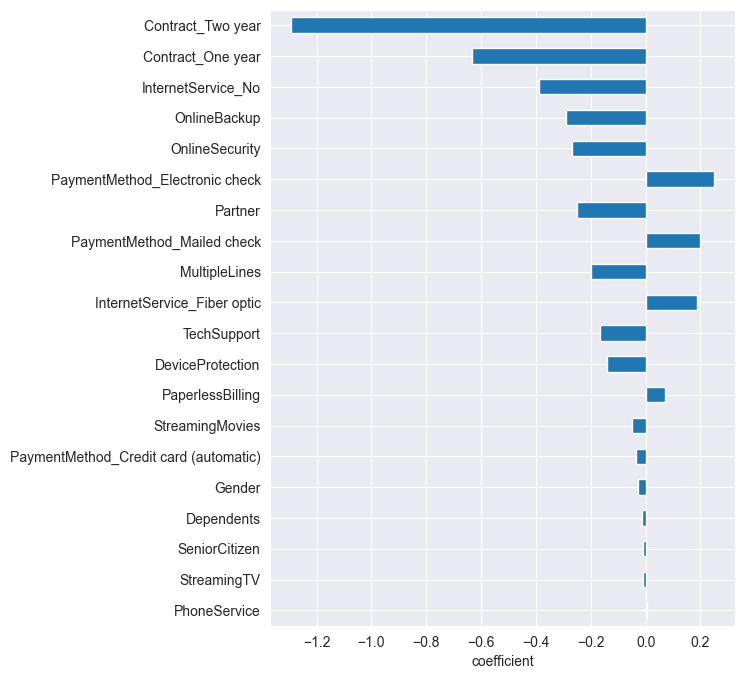

In [56]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=Xt.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

The above plot gives us the value of coefficients of the best model chosen with the Cross-Validation technique. Important variables are clearly noticeable from the above plot! We will see if other models choose the same variables as well. 

## Parametric Methods

## Weibull Survival Model (or) Accelerated Failure Time Model

In [57]:
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [58]:
data = pd.read_csv("data/customer_churn_data.csv")

In [59]:
## Churn = 'Yes' - the customer has cancelled subscription with the company
## Churn = 'No'  - the customer has been censored/lost track of the customer

In [60]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["CustomerID","TotalCharges"], inplace = True, axis = 1)

    #df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    #df.TotalCharges.fillna(0, inplace = True)
    #df.TotalCharges = df.TotalCharges.astype(float)
  
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.Gender = df.Gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'Yes': 1, 'No internet service': 0, 'No': 0})

    categories = ['InternetService', 'Contract', 'PaymentMethod']
    
    df = pd.get_dummies(df, columns = categories, drop_first=True)
    
    return df

In [61]:
data = datapreparation('data/customer_churn_data.csv')

The AIC value for the Weibull model is less than the Exponential Model. Therefore, we will use that for parametric modeling!

In [62]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter

# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()

# Fit to data
for model in [wb, ex]:
    model.fit(durations = data["Tenure"], event_observed = data["Churn"])
# Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 21157.25189215942
The AIC value for ExponentialFitter is 21697.15196629894


In [63]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data, duration_col='Tenure', event_col='Churn')
weibull_aft.print_summary(1)

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'Tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -8915.6
         time fit was run = 2024-07-29 16:23:52 UTC

---
                                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                              
lambda_ Contract_One year                       1.6       4.8       0.1             1.4             1.8                 4.0                 5.8
        Contract_Two year                       2.8      16.9       0.2             2.5             3.2                12.0                23.8
        Dependents                              0.1       1.1       0.1            -0.0             0.2                 1.0                 1.3
        DeviceProtection                        0.3       1.3       0.1            -0.0             0.5                 1.0                 1.7
        Gender                                 -0.1       0.9       0.1            -0.2             0.0                 0.8                 1.0
        InternetService_Fiber optic            -0.7       0.5       0.6            -1.9             0.5                 0.1                 1.7
        InternetService_No                      1.5       4.5       0.6             0.3             2.7                 1.3                15.5
        MonthlyCharges                          0.0       1.0       0.0            -0.0             0.1                 1.0                 1.1
        MultipleLines                           0.4       1.5       0.1             0.2             0.7                 1.2                 2.0
        OnlineBackup                            0.6       1.8       0.1             0.3             0.8                 1.4                 2.3
        OnlineSecurity                          0.6       1.9       0.1             0.3             0.9                 1.4                 2.5
        PaperlessBilling                       -0.2       0.8       0.1            -0.3            -0.1                 0.7                 0.9
        Partner                                 0.5       1.7       0.1             0.4             0.6                 1.5                 1.9
        PaymentMethod_Credit card (automatic)   0.1       1.1       0.1            -0.1             0.3                 0.9                 1.3
        PaymentMethod_Electronic check         -0.6       0.5       0.1            -0.8            -0.5                 0.5                 0.6
        PaymentMethod_Mailed check             -0.6       0.5       0.1            -0.8            -0.4                 0.4                 0.6
        PhoneService                           -0.3       0.7       0.5            -1.3             0.7                 0.3                 1.9
        SeniorCitizen                           0.1       1.1       0.1            -0.1             0.2                 0.9                 1.2
        StreamingMovies                         0.0       1.0       0.3            -0.5             0.5                 0.6                 1.7
        StreamingTV                            -0.1       0.9       0.3            -0.6             0.4                 0.6                 1.5
        TechSupport                             0.4       1.5       0.1             0.1             0.7                 1.1                 2.0
        Intercept                               3.3      26.4       0.6             2.0             4.5                 7.7                90.8
rho_    Intercept                              -0.1       0.9       0.0            -0.1            -0.0                 0.9                 1.0

                                               cmp to    z     p  -

#### Interpretations

A concordance index or c-index of 0.9 means that the model predict's the survival times with high accuracy. It indicates the model's ability to correctly rank the order of survival times of customers, such that those with shorter survival times are predicted to churn earlier and those with higher survival times would stay with the company for longer.

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

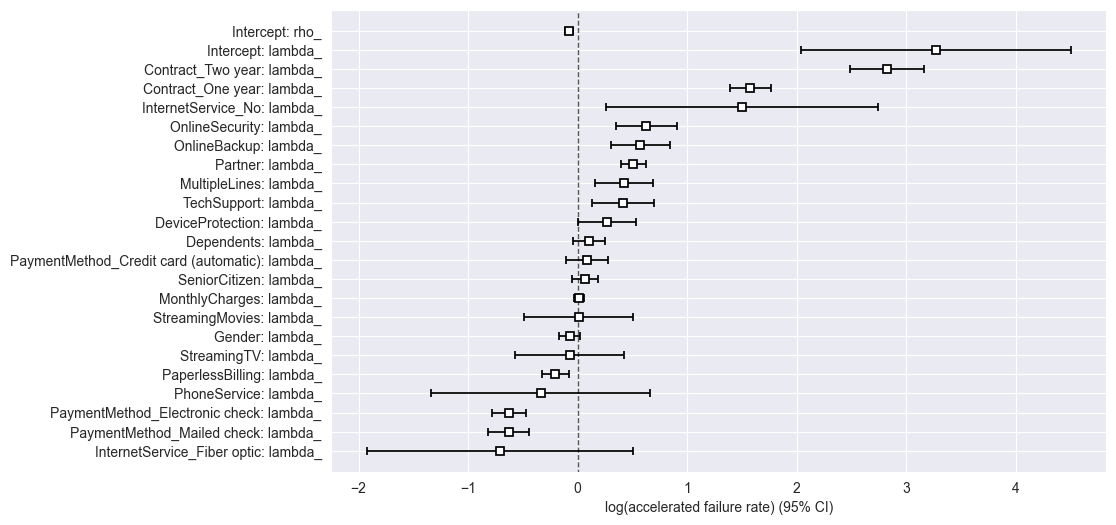

In [64]:
# Plotting coeffiecients
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

In [65]:
# Median Survival Time (in months)
print(weibull_aft.median_survival_time_.round(2))

24.21


In [66]:
# Mean Survival Time (in months)
print(weibull_aft.mean_survival_time_.round(2))

37.39


#### Interpretations 

Let us look at the variable - Contract.
Customers essentially register with the company on (a) Monthly contract, (b) One-Year contract or (c) Two-eyars contract.

1) Customers who enroll in the Two-Year option have an estimated survival time of exp(coef) = 16.9 times the ones opted for the Monthly option(baseline model).

2) Similarly, customers who enrolled in One-Year contracts have an estimated survival time of exp(coef) = 4.8 times the Monthly customers. 

Therefore, the company should lure customers to opt for longer contracts in order to get higher CLV(Customer Lifetime Value)

Another interesting service to look at is the company's Internet Service option.

Customers who have NOT opted for the company's internet service have a positive coefficient of 1.5. This means that Customers who have opted Internet_Service = (No) have 4.5 times better survival chance than the ones who have opted Internet_Service = (Yes).

This probably means that the company's internet service is not upto the customer's expectation!

## Conclusion

Data analysis plays a pivotal role in evidence-based decision-making across industries. One critical challenge many companies face is customer churn, the loss of clients or subscribers. Understanding the factors that influence churn is essential for developing effective retention strategies.

Survival analysis and Kaplan-Meier (KM) curves are powerful tools for visualizing and comparing the time-to-event patterns between groups (e.g., churned vs. non-churned customers). These techniques can unveil unexpected disparities, highlighting areas for further investigation.

In the telecommunications industry, it's often assumed that longer contract durations lead to lower churn. However, a deeper analysis of available data often reveals a different reality. While long-term contracts might initially attract customers, the spike in churn rates observed upon contract expiration suggests that customer satisfaction and perceived value may not be sustained throughout the contract period. This could be attributed to various factors, such as service quality, pricing, or changing customer needs.

To gain a more comprehensive understanding of churn drivers, it's crucial to explore a wider range of variables. Analyzing factors like customer service interactions (e.g., calls to tech support), service outages, and other relevant metrics can provide valuable insights.

Addressing churn often involves a multi-faceted approach. While some "quick wins" can be achieved through relatively simple interventions, a comprehensive data analysis can uncover deeper, systemic issues that require more substantial solutions.  By understanding the root causes of churn and tailoring retention strategies accordingly, companies can foster long-term customer loyalty and drive sustainable growth.

#### Key Improvements:

* <b>Clarity</b>: The revised conclusion is more concise and focused, eliminating unnecessary details and redundancies.
Emphasis on Data Analysis: The importance of thorough data analysis for both identifying quick wins and uncovering systemic issues is highlighted.
* <b>Balanced Perspective</b>: The conclusion acknowledges the potential limitations of relying solely on contract length as a churn predictor and advocates for a broader analysis of contributing factors.
* <b>Actionable Recommendations</b>: The revised conclusion indirectly suggests that companies should focus on improving customer satisfaction and service quality, along with implementing targeted retention strategies based on data-driven insights.